# Energy Table Notebook

In [19]:
# Import libraries
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import PandasTools
from psikit import Psikit
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

In [20]:
# Import data
data = pd.read_csv('smiles.csv')

In [21]:
data.head()

,smiles
0,C=C
1,C=O
2,C#N
3,CCO
4,CCC(=O)O


In [24]:
# Add columns
PandasTools.AddMoleculeColumnToFrame(data, smilesCol='smiles')
data['n_atoms'] = data['ROMol'].map(lambda x : x.GetNumAtoms())

In [26]:
# Add energy
pk = Psikit()
energy = []
for smile in data['smiles']:

    # Calculate
    pk.read_from_smiles(smile)
    %time   # Get time of calculation
    energy.append(pk.optimize())

# Add column
data['energy'] = energy


  Memory set to   3.725 GiB by Python driver.
  Threads set to 4 by Python driver.
CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 5.25 µs
Optimizer: Optimization complete!
CPU times: user 9 µs, sys: 1 µs, total: 10 µs
Wall time: 5.72 µs
Optimizer: Optimization complete!
CPU times: user 0 ns, sys: 10 µs, total: 10 µs
Wall time: 6.68 µs
Optimizer: Optimization complete!
CPU times: user 17 µs, sys: 1e+03 ns, total: 18 µs
Wall time: 11.7 µs
Optimizer: Optimization complete!
CPU times: user 15 µs, sys: 0 ns, total: 15 µs
Wall time: 7.39 µs
Optimizer: Optimization complete!
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs
Optimizer: Optimization complete!
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs
Optimizer: Optimization complete!
CPU times: user 21 µs, sys: 1 µs, total: 22 µs
Wall time: 6.68 µs
Optimizer: Optimization complete!
CPU times: user 9 µs, sys: 1e+03 ns, total: 10 µs
Wall time: 8.58 µs
Optimizer: Optimization complete!
CPU times: user 

,smiles,ROMol,n_atoms,energy
0,C=C,,2,-78.038769
1,C=O,,2,-113.869536
2,C#N,,2,-92.876942
3,CCO,,3,-154.089919
4,CCC(=O)O,,5,-266.858985
5,CN=C=O,,4,-206.795593
6,C1=CCC=CC1,,6,-231.846762
7,C1=CC=CC=C1,,6,-230.713524
8,C1=C(C)C=CC=C1,,7,-269.753552
9,C1CCC2CCCCC2C1,,10,-389.204842

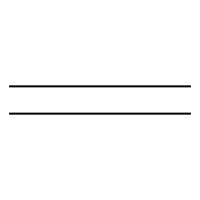
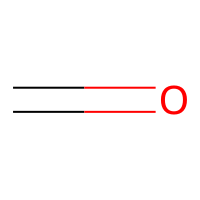
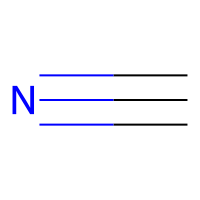
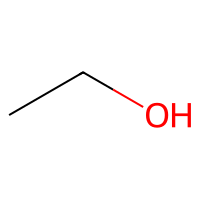
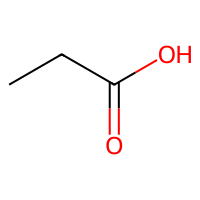
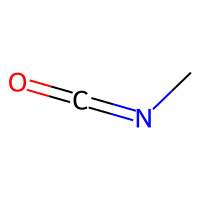
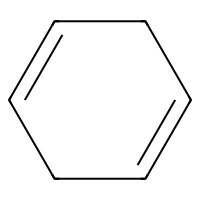
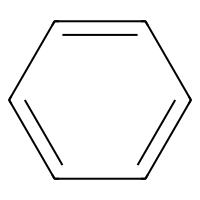
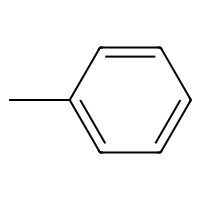
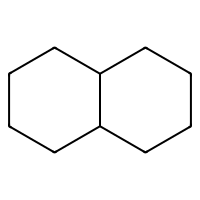

In [27]:
data